### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

## GitHub repository URL

### https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-apr20-SubratMuruni.git

## 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np # Importing Numpy
import pandas as pd # Importing Pandas
import scipy.stats as stats # Importing Scipy for statistical operations
import matplotlib.pyplot as plt # Importing Matplotlib
import seaborn as sns # Importing Seaborn
sns.set(color_codes = True) # setting the background of the visualization graph
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from sklearn.preprocessing import LabelEncoder,OneHotEncoder # Importing functions from Sklearn for dummy variables

## 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Path where the data file is stored is referenced while accessing the files. 
# These files are not in the working directory where pythong is installed
# Created 3 data frames 'Userrating' for data.csv file, 'movie' for item.csv file, 'user' for user.csv file

userrating = pd.read_csv('/Users/subratmuruni/desktop/Data Science/Projects_Assignments/Project_1_dataset/data.csv')
movie = pd.read_csv('/Users/subratmuruni/desktop/Data Science/Projects_Assignments/Project_1_dataset/item.csv')
user = pd.read_csv('/Users/subratmuruni/desktop/Data Science/Projects_Assignments/Project_1_dataset/user.csv')

In [12]:
# Display that the Dataframe for userrating has been created successfully

userrating.head(5)# First 5 rows

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
# Display that the Dataframe for movie has been created successfully

movie.head(5)# First 5 rows

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Display that the Dataframe for user has been created successfully

user.head(5)# First 5 rows

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [33]:
# Info, Shape, Describe and finding missing values for the User dataset

print(user.info()) # use info funciton to display information about the dataframe
print(' ')
print(user.shape) # use shape to show the rows x columns in the dataframe
print(' ')
print(user.describe()) # use describe to get the 5-point summary for the dataframe
print(' ')
print(user.isnull().sum()) # use isnull function in conjunction with sum function to find the missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
 
(943, 5)
 
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
 
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


In [34]:
# Info, Shape, Describe and finding missing values for the Movie dataset

print(movie.info()) # use info funciton to display information about the dataframe
print(' ')
print(movie.shape) # use shape to show the rows x columns in the dataframe
print(' ')
print(movie.describe()) # use describe to get the 5-point summary for the dataframe
print(' ')
print(movie.isnull().sum()) # use isnull function in conjunction with sum function to find the missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [35]:
# Info, Shape, Describe and finding missing values for the Movie dataset

print(userrating.info()) # use info funciton to display information about the dataframe
print(' ')
print(userrating.shape) # use shape to show the rows x columns in the dataframe
print(' ')
print(userrating.describe()) # use describe to get the 5-point summary for the dataframe
print(' ')
print(userrating.isnull().sum()) # use isnull function in conjunction with sum function to find the missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
 
(100000, 4)
 
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
 
user id      0
movie

## 4. Find the number of movies per genre using the item data - 5 marks

In [26]:
# Finding columns which correspond to Genre
#Creating a new dataframe based on these columns
#applying the sum function on these columns on the default axis

movie.columns # Columns from dataframe movie

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [3]:
# creating a new dataframe new_movie with only the Genre as columns

new_movie = movie[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']] 

new_movie.head(5) # Display the newly created dataframe

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [32]:
print(new_movie.sum()) # print sum per column which gives the number of movies per genre

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


## 5. Find the movies that have more than one genre - 2.5 marks

In [39]:
# Copy new_movie to new_movie_1 to prevent warning originiating from manipulation on a sliced view. 
# Sum of genre per row from new_movie_1 dataframe with argument axis=1 by creating a new column/series 'sum_genre'
# Create a new data frame by concatenating the 'sum_genre' series from new_movie_1 with series 'movie id', 'movie title' from dataframe movie
# Display rows from the new dataframe 'more_genre' by using logical sum_genre >1

new_movie_1 = new_movie.copy() # Creating a new dataframe by copying the new_movie dataframe to avoid Python warnings
new_movie_1.head(5) # Display the first 5 rows of the new dataframe


,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [40]:
# create a new column to capture the sum of the genre per row

new_movie_1['sum_genre'] = new_movie_1.sum(axis=1) 

new_movie_1.head(5) # display the first 5 rows of dataframe with the new column sum_genre

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum_genre
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3


In [41]:
more_genre = pd.concat([movie['movie id'],movie['movie title'],new_movie_1['sum_genre']],axis=1, sort=False)
# create dataframe 'more_genre' by concatenating the 'sum_genre' series with 'movie id' and 'movie title' series

more_genre.head(10) # display the first 10 rows of the new dataframe 


,movie id,movie title,sum_genre
0,1,Toy Story,3
1,2,GoldenEye,3
2,3,Four Rooms,1
3,4,Get Shorty,3
4,5,Copycat,3
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),1
6,7,Twelve Monkeys,2
7,8,Babe,3
8,9,Dead Man Walking,1
9,10,Richard III,2


In [47]:
new_df = more_genre[more_genre['sum_genre']>1] # For sum_genre >1, i.e more than 1 genre, display the rows of data. 

new_df # new_df is the dataframe that contains all movies that correspond to more than 1 genre

# The total rows amount to 849

,movie id,movie title,sum_genre
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
...,...,...,...
1667,1669,MURDER and murder,3
1668,1670,Tainted,2
1671,1673,Mirage,2
1677,1679,B. Monkey,2


## 6. Drop the movie where the genre is unknown - 2.5 marks

In [45]:
# Copy the movie dataframe in to a new dataframe movie_drp
# Find out the number of rows where unknown ==1
# Use the drop function to drop the rows where unknown ==1
# Verify if the rows have been dropped or not. 

movie_drp = movie.copy() # Copy the 'movie' dataframe to a new dataframe 'movie-drp'

movie_drp[movie_drp['unknown']== 1] # Find out the number of rows with unknown == 1

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1371,1373,Good Morning,4-Feb-1971,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Use the drop() function to delete the row with 
 
movie_drp.drop(movie_drp[movie_drp['unknown']==1].index, inplace =True) # .index drops the rows

movie_drp[movie_drp['unknown']== 1] # verify that the row with unknown == 1 has been dropped. 

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


## 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

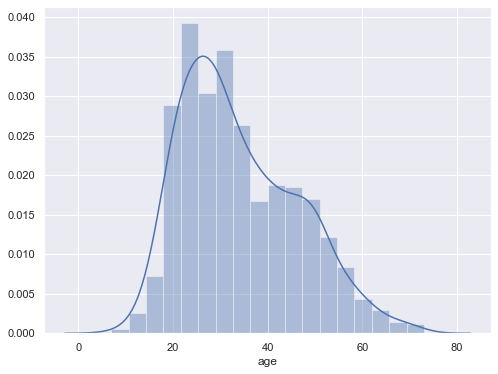

In [49]:
# Distplot for age

plt.figure(figsize=(8,6)) # set the plot size

sns.distplot(user['age'],rug=False); #Display the univariate distplot with kde for age

plt.show()

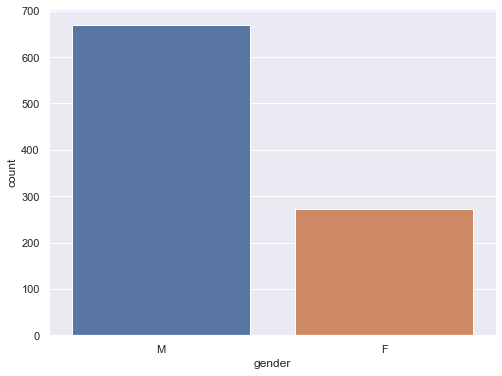

In [50]:
# Countplot for gender

plt.figure(figsize=(8,6)) # Set the plot size

sns.countplot(user['gender']); # Univariate countplot for gender

plt.show()

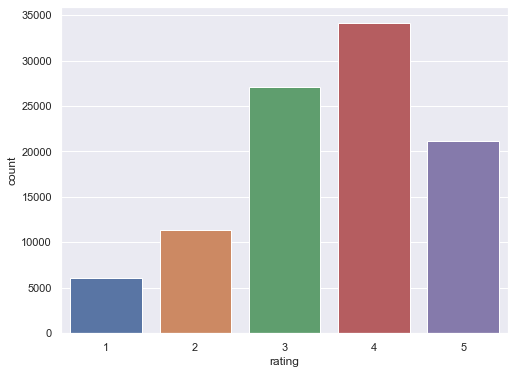

In [51]:
# Countplot for ratings

plt.figure(figsize=(8,6)) #set the plot size

sns.countplot(userrating['rating']); # Univariate countplot for rating

plt.show()

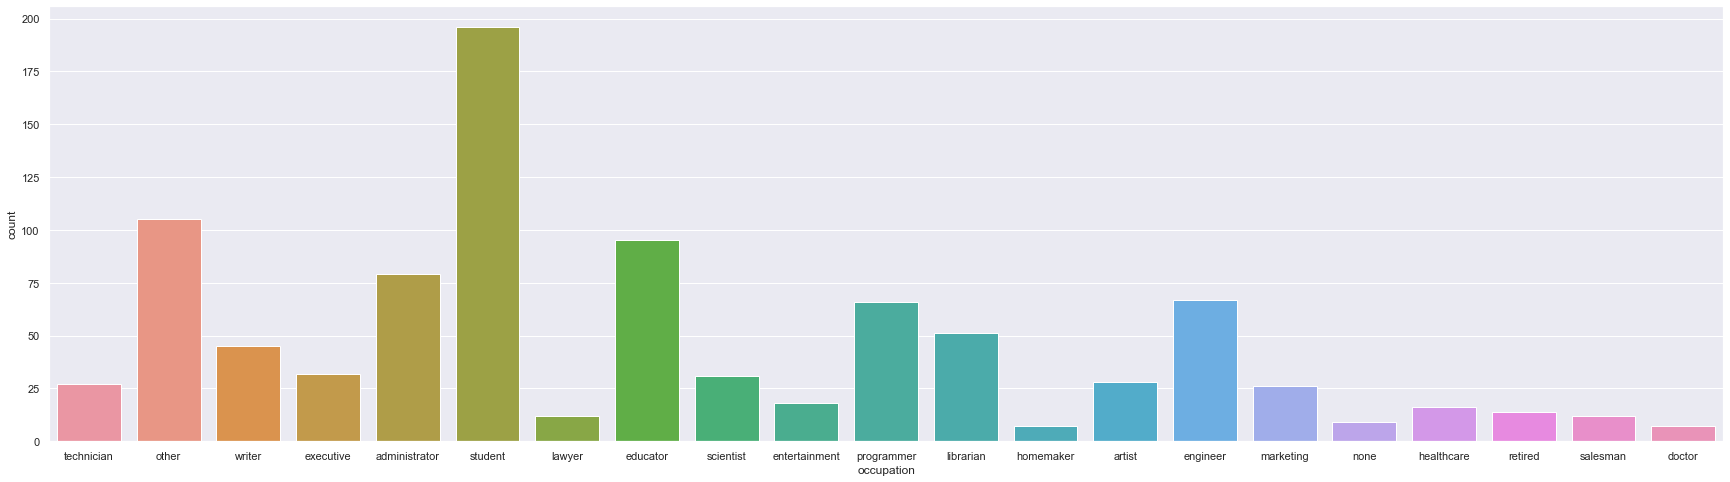

In [52]:
# Countplot for occupation

plt.figure(figsize=(30,8)) # set the plot size

sns.countplot(user['occupation']); # Univariate countplot for occupation

plt.show()

In [55]:
# Distplot for release year 
# Copied the original dataframe into a new dataframe 'movie_new'

movie_new = movie.copy() 

In [56]:
# Use the str.spit() function to split the release date into Day, Month and Year Columns

new_col = movie_new['release date'].str.split('-',3, expand=True)
new_col.head(5)

,0,1,2
0,01,Jan,1995
1,01,Jan,1995
2,01,Jan,1995
3,01,Jan,1995
4,01,Jan,1995


In [58]:
# Create a new Series for the year only

movie_new['release year'] = pd.Series(new_col[2])
movie_new['release year'].head(5)

0    1995
1    1995
2    1995
3    1995
4    1995
Name: release year, dtype: object

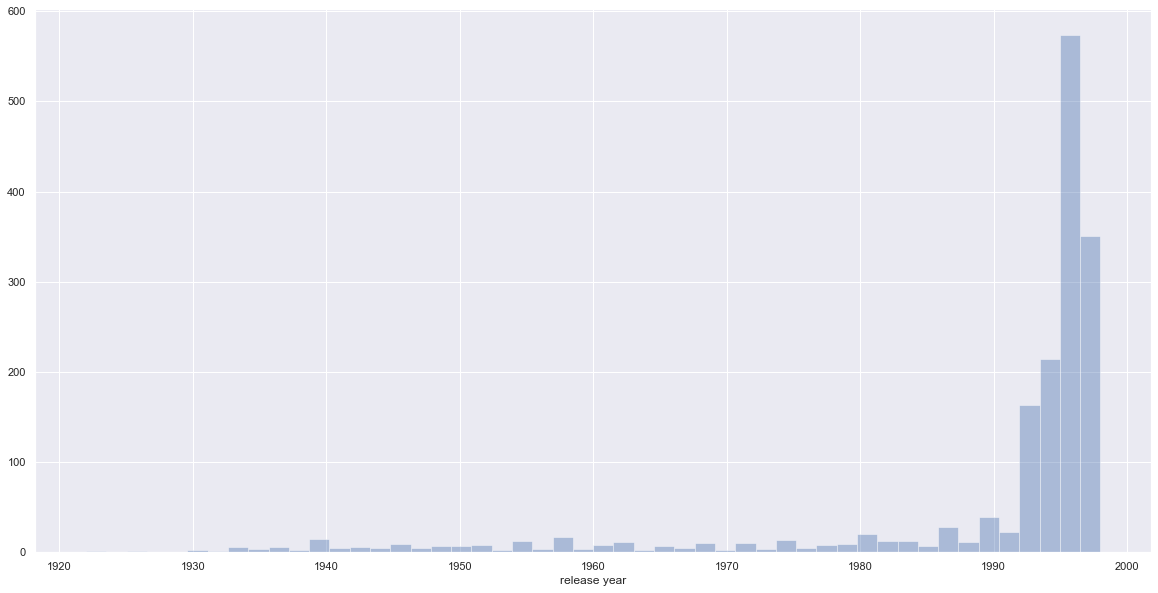

In [59]:
# Plot the distplot for the release year with Kernel density estimate switched off

plt.figure(figsize=(20,10)) # set the plot size

sns.distplot(movie_new['release year'], kde=False ); # univariate distplot for release year with kde=False

plt.show()

## 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

In [ ]:
# Add a new column 'release year' to the dataframe movie
# Create an new dataframe by using the relevant columns from the 'movie' dataframe
# Apply groupby() on 'release year' and sum() on the columns
# Plot the heatmap using the dataframe

In [68]:
# add a new column 'release year' to the movie dataframe

movie['release year'] = movie_new['release year']

# create a new dataframe 'movie_release' comprising of the relevant columns

movie_release = movie[['release year','unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [69]:
# Apply groupby() on release year and sum() on all the columns and represent this as a new dataframe 'df_movie_release'

df_movie_release = movie_release.groupby('release year')['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'].sum()

df_movie_release.head(5) # prints the first 5 rows of the new dataframe

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


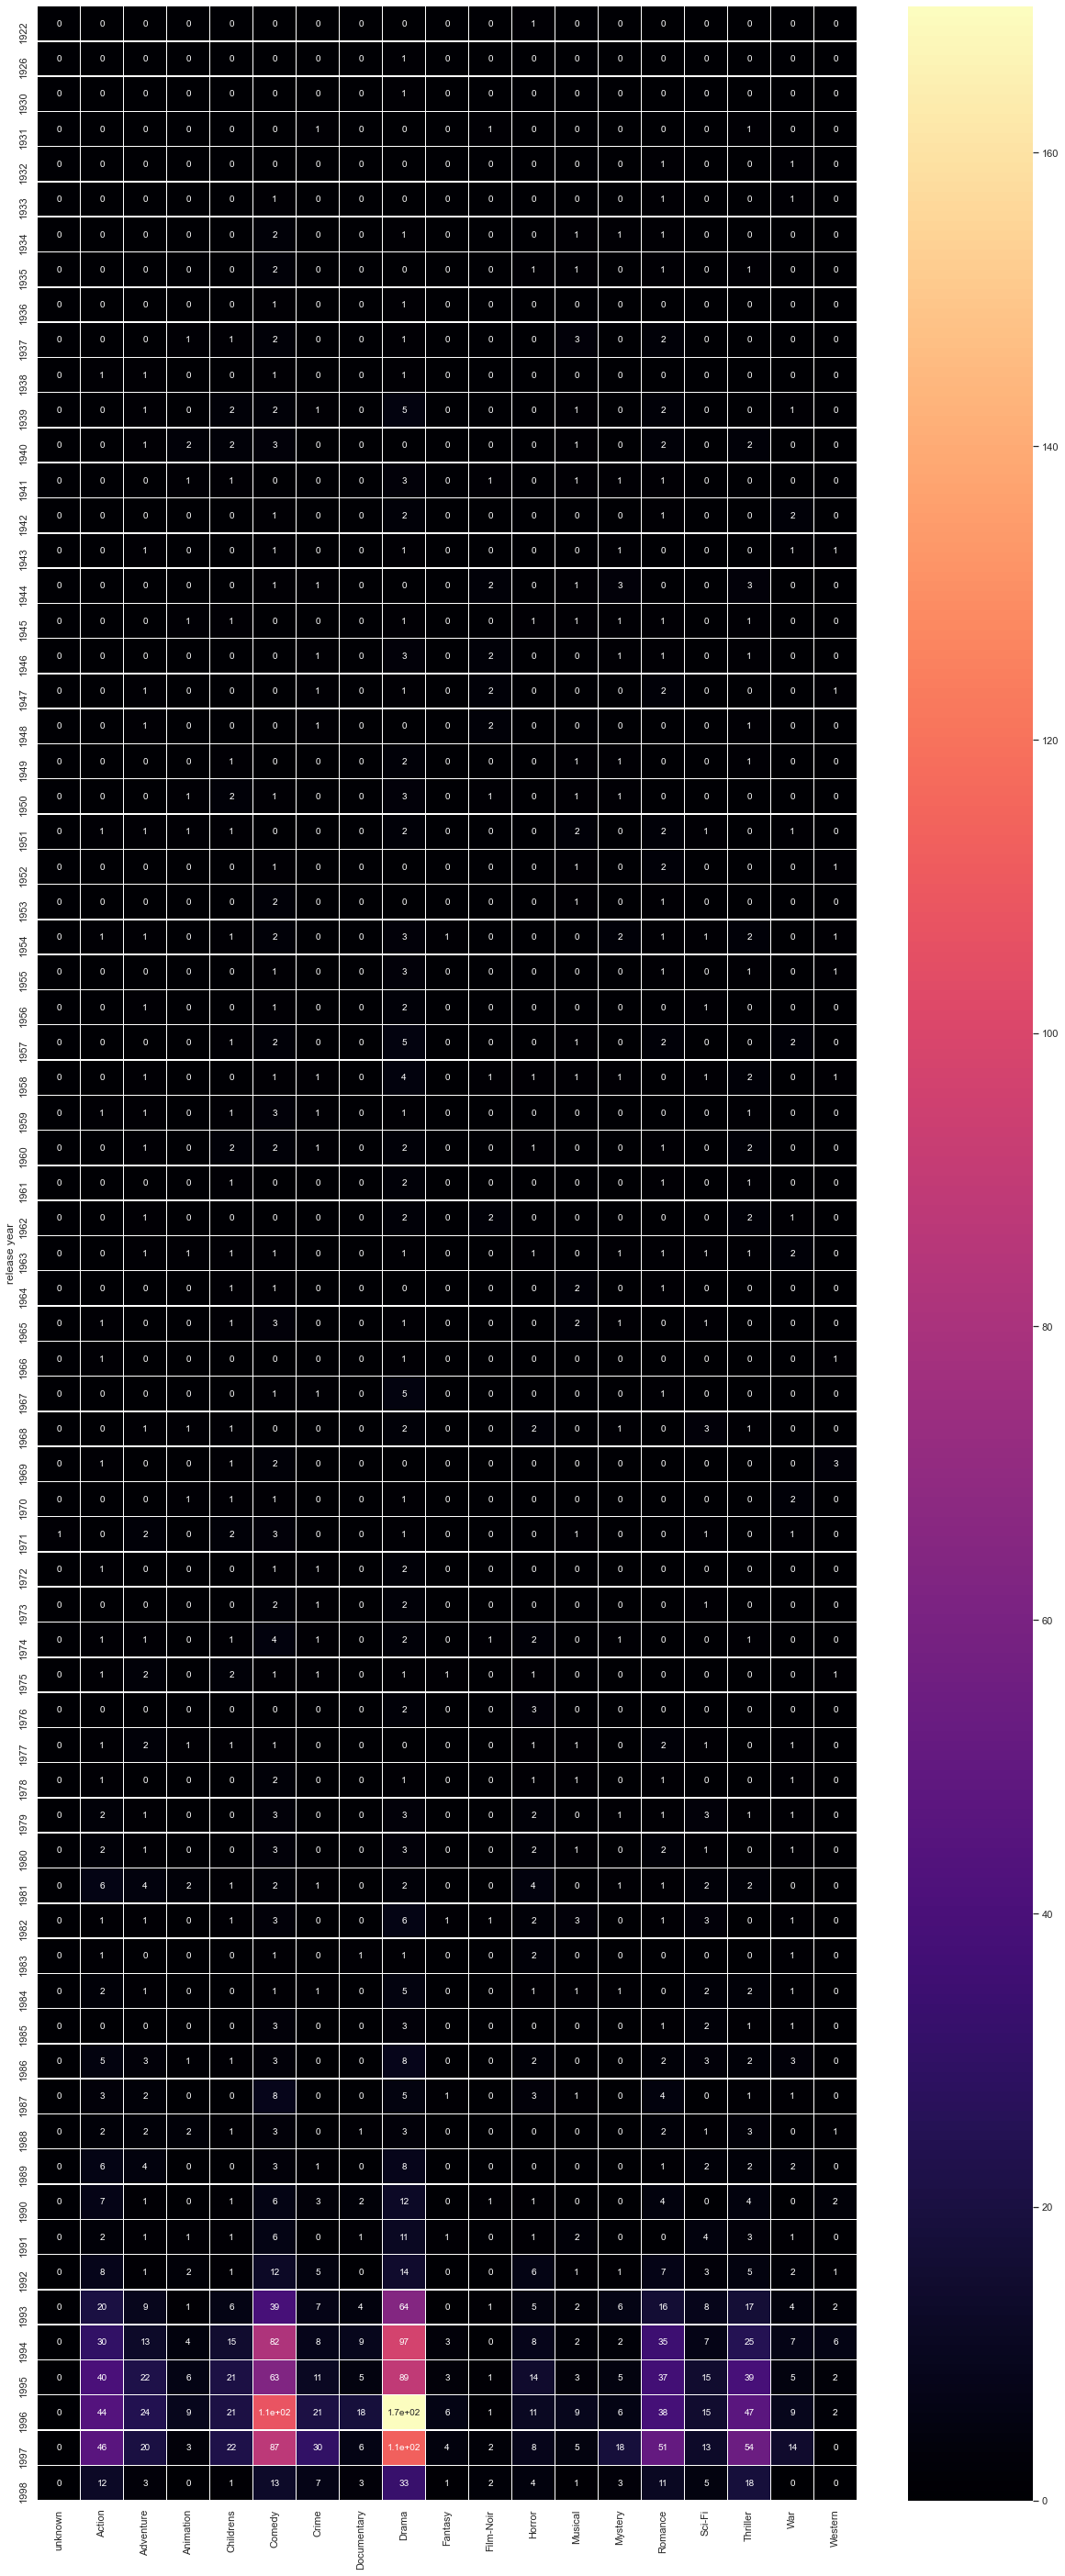

In [70]:
# Plot the heatmap of the new dataframe df_movie_release

plt.figure(figsize=(20,50))
sns.heatmap(df_movie_release,annot =True,linewidth =0.5, cmap='magma');
plt.show()

# Popularity of a genre can be depicted as the color varies in the heatmap. 
# The lighter color indicates more number of releases of the particular genre movie and hence and indication of popularity. 



## 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks



In [78]:
# Finding movies that have more than 100 ratings

df_new_movie = pd.merge(movie,userrating,how='inner',on='movie id') # Merge dataframes 'movie' and 'userrating'

# Take the columns 'movie id','movie title' and 'rating' 
df_new_movie = df_new_movie[['movie id','movie title','rating']] 

# create a dataframe by grouping movies based on 'movie id' while taking the count of ratings
movie_rating = df_new_movie.groupby(['movie id','movie title'])['rating'].count().reset_index(name='count')

# Find the movie titles with rating count greater than 100
movie_title = movie_rating[['movie id','movie title','count']][movie_rating['count']>100]

movie_title # Print the dataframe having rating count greater than 100

,movie id,movie title,count
0,1,Toy Story,452
1,2,GoldenEye,131
3,4,Get Shorty,209
6,7,Twelve Monkeys,392
7,8,Babe,219
...,...,...,...
924,926,Down Periscope,101
926,928,"Craft, The",104
1014,1016,Con Air,137
1026,1028,Grumpier Old Men,148


In [79]:
# Find the movie title with average rating arranged in descending order

movie_avg_rating = df_new_movie.groupby(['movie id','movie title'])['rating'].mean().sort_values(ascending=False).reset_index(name='Average')

movie_avg_rating # print the dataframe having average rating in descending order


,movie id,movie title,Average
0,814,"Great Day in Harlem, A",5.0
1,1500,Santa with Muscles,5.0
2,1653,Entertaining Angels: The Dorothy Day Story,5.0
3,1599,Someone Else's America,5.0
4,1122,They Made Me a Criminal,5.0
...,...,...,...
1676,1601,Office Killer,1.0
1677,1579,Baton Rouge,1.0
1678,1494,"Mostro, Il",1.0
1679,1493,"Modern Affair, A",1.0


In [80]:
# Print the top 25 movies according to average ratings such that each movie has number of rating >100

movie_avg_rating[['movie id','movie title','Average']][movie_avg_rating['movie id'].isin(movie_title['movie id'])].head(25)

,movie id,movie title,Average
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [96]:
# Merge the three dataframes 'movie','user' and 'userrating'
# Apply the sum() function on genre column and rows grouping by gender
# Apply the div() function on the rows to find out the %age per genre (rating by gender per genre/total rating by gender)

In [97]:
# Merge dataframes 'user' and 'userrating' on 'user id' which is the common column
df_user_new = pd.merge(user,userrating,how='inner',on='user id')

# Merge dataframes 'df_user_name' and 'movie' on 'movie id' which is the common column
df_user_movie = pd.merge(df_user_new,movie,how='inner',on='movie id')

df_user_movie.head(5)

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [98]:
# Create a new dataframe using the relevant columns that are needed for validations

df_user_movie_1 = df_user_movie[['user id','gender','unknown',
       'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

df_user_movie_1.head(5)

,user id,gender,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,58,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,59,M,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
# Use sum() function to find the sum per genre of movies grouping by gender for columns

df_user_movie_1 = df_user_movie_1.groupby('gender')['unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western'].sum()

df_user_movie_1

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [100]:
# Use sum() function to find the total sum of genre per gender

df_user_movie_1['sum_genre'] = df_user_movie_1.sum(axis=1)

df_user_movie_1

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum_genre
gender,,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158885


In [101]:
# Copying the datafram into a new dataframe and transposing for applying div() function
 
df1 = df_user_movie_1.copy()
df1 = df1.T

df1

gender,F,M
unknown,0,1
Action,5442,20147
Adventure,3141,10612
Animation,995,2610
Childrens,2232,4950
Comedy,8068,21764
Crime,1794,6261
Documentary,187,571
Drama,11008,28887
Fantasy,363,989


In [102]:
# Applying div() function per column to arrive at the %age of rating per genre per gender over the total rating per genre

df1['F'] = df1['F'].div(df1.loc['sum_genre','F'])

df1['M'] = df1['M'].div(df1.loc['sum_genre','M'])

df1

gender,F,M
unknown,0.000000,0.000006
Action,0.101339,0.126802
Adventure,0.058491,0.066790
Animation,0.018529,0.016427
Childrens,0.041563,0.031155
Comedy,0.150239,0.136980
Crime,0.033407,0.039406
Documentary,0.003482,0.003594
Drama,0.204987,0.181811
Fantasy,0.006760,0.006225


In [103]:
#Transposing back the dataframe

df2 = df1.T

df2

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum_genre
gender,,,,,,,,,,,,,,,,,,,,
F,0.000000,0.101339,0.058491,0.018529,0.041563,0.150239,0.033407,0.003482,0.204987,0.006760,0.007169,0.022290,0.026852,0.024469,0.109085,0.048956,0.094710,0.040763,0.006909,1.0
M,0.000006,0.126802,0.066790,0.016427,0.031155,0.136980,0.039406,0.003594,0.181811,0.006225,0.008484,0.025931,0.022104,0.024741,0.085615,0.063574,0.105649,0.045372,0.009334,1.0


In [104]:
# Resetting the index of the dataframe to use gender as a column for plots

df2.reset_index(inplace=True)

df2

,gender,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,sum_genre
0,F,0.000000,0.101339,0.058491,0.018529,0.041563,0.150239,0.033407,0.003482,0.204987,...,0.007169,0.022290,0.026852,0.024469,0.109085,0.048956,0.094710,0.040763,0.006909,1.0
1,M,0.000006,0.126802,0.066790,0.016427,0.031155,0.136980,0.039406,0.003594,0.181811,...,0.008484,0.025931,0.022104,0.024741,0.085615,0.063574,0.105649,0.045372,0.009334,1.0


# Conclusion:




Men watch more drama than women  
### False
Women watch more Sci-Fi than men
### False
Men watch more Romance than women
### False


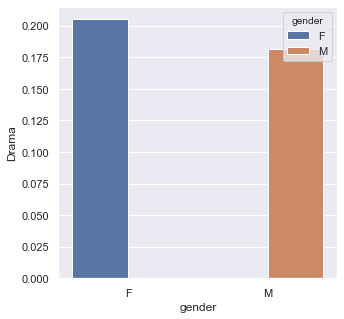

In [114]:
plt.figure(figsize=(5,5))

sns.barplot(df2['gender'], df2['Drama'], hue=df2['gender']);

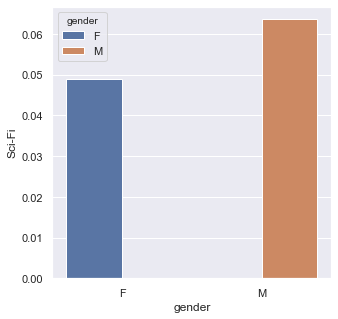

In [115]:
plt.figure(figsize=(5,5))

sns.barplot(df2['gender'],df2['Sci-Fi'], hue=df2['gender']);

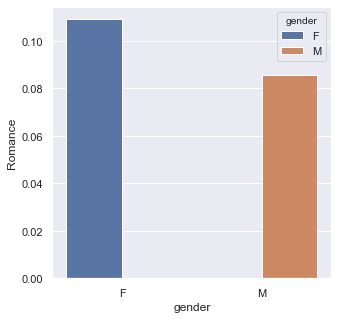

In [117]:
plt.figure(figsize=(5,5))

sns.barplot(df2['gender'],df2['Romance'], hue=df2['gender']);